# Homework for Lecture on May 21, 2021

In [2]:
import numpy as np
from qiskit import *
from qiskit.providers.ibmq import least_busy
from qiskit.visualization import plot_histogram

## Replacing CX gates with CZ gates

One of the key techniques in the Bernstein-Vazirani and Deutsch-Jozsa algorithms is the *phase-kickback*.  
That is, given an oracle (or, blackbox function) that computes $f(x) \in \{0,1\} $ from the input $x$, we record the 
output $f(x)$ at the phase.  Namely, given

\begin{eqnarray}
\mathbf{O}_f \left|x\right>\left|y\right>  &= \left|x\right>\left|y \oplus f(x)\right>,
\end{eqnarray}
where $y \in \{0,1\}$, we prepare $\left|-\right> = \frac{1}{\sqrt{2}} \left(\left|0\right> - \left|1\right>\right)$ at the register recording the value of $f(x)$ to obtain 
\begin{eqnarray}
\mathbf{O}_f \left|x\right> \left|-\right>  &= (-1)^{f(x)} \left|x\right> \left| - \right>.
\end{eqnarray}

### **Question 1** (20 points) 
Show that the following circuits are equivalent. The gate on the left-hand-side is CX (or, controlled-NOT) and the circuit on the right-hand-side uses CZ (or, controlled-Z) gate.  

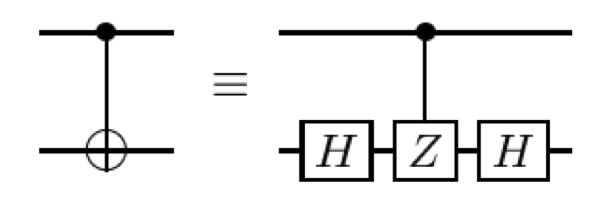

### **Question 2** (30 points) 
At the lectures, we explained quantum circuits performing such phase-kickback using CX gates. If the quantum devices have native CZ gates as basis gates, how to modify the above quantum circuits to instead use CZ gates?

# Answer for question 1

$$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$$
$$\newcommand{\bra}[1]{\left\langle{#1}\right|}$$


\begin{eqnarray}
CNOT = \ket{0}\bra{0} \otimes 1 + \ket{0}\bra{0} \otimes X \newline \text{ and by using } HZH = X \text{ and } HH = 1 \newline
\end{eqnarray}
we can show that above statement

# Answer for question2

wrapping bunch of CZ gate with H gate. for example, see the following code



In [3]:
n = 3
balanced_function = QuantumCircuit(n+1,n)
balanced_function.barrier()   #visual aid

balanced_function.h(3)
for qubit in range(n):    #cx gates on all input qubits
    balanced_function.cz(qubit, n)
balanced_function.h(3)

balanced_function.barrier() #visual aid
balanced_function.draw()

░                     ░ 
q_0: ─░───────■─────────────░─
      ░       │             ░ 
q_1: ─░───────┼──■──────────░─
      ░       │  │          ░ 
q_2: ─░───────┼──┼──■───────░─
      ░ ┌───┐ │  │  │ ┌───┐ ░ 
q_3: ─░─┤ H ├─■──■──■─┤ H ├─░─
      ░ └───┘         └───┘ ░ 
c: 3/═════════════════════════

## Quantum advantage without entanglement

### **Question 3** (50 points) 
Entangling gates, such as the CX and CZ gates, are expensive and noisier than single-qubit gates. Based on the answer of Question 2, we can see that the phase becomes negative if and only if the control qubit is $\left|1\right>$ while the target qubit is always $\left|1\right>$. This implies that we can perform the phase-kickback in the Bernstein-Vazirani algorithm **without using entangling gates**. 
Suppose that the secret string is $s \in \{0,1\}^n$. Then, the oracle of the Bernstein-Vazirani algorithm transforms $\left|x\right>$ into $(-1)^{s\cdot x} \left|x\right>$, where $s\cdot x \equiv \sum_i s_i x_i \mod 2$. Notice that because 

\begin{equation}
(-1)^{s\cdot x} = (-1)^{s_1 x_1} (-1)^{s_2 x_2} \ldots (-1)^{s_n x_n} = \prod_{i: s_i = 1} (-1)^{x_i}, 
\end{equation}
the oracle can be realized by the following unitary operators

\begin{equation}
O_s = O_{s^1} \otimes O_{s^2} \otimes \ldots \otimes O_{s^n},
\end{equation}
where $O_{s^i} \in \{ \mathbf{I}, \mathbf{Z} \}$ are $2 \times 2$ matrices. Modify the quantum oracle for the Bernstein-Vazirani algorithm by the above oracle, and run the circuit on quantum devices and confirm the results are better than using CX or CZ gates. With some luck, we may be able to run the algorithm with any secret bitstring $s$ of length $53$.

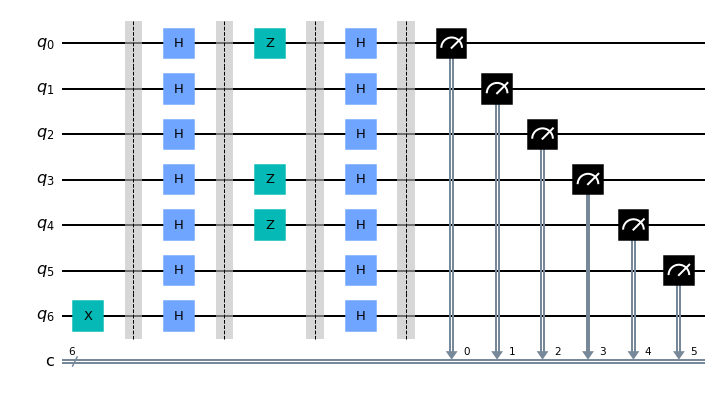

In [4]:
# Step 1　Construct secret binary string
s = '011001'

n = len(s)
qc = QuantumCircuit(n+1,n)

qc.x(n) #apply x gate
qc.barrier() #visual aid
qc.h(range(n+1)) #Apply hadamard gates to close circuit
qc.barrier() #visual aid
for ii, yesno in enumerate(reversed(s)):
    if yesno == '1': 
        qc.z(ii)

qc.barrier() # visual aid
qc.h(range(n+1)) #apply h gates

qc.barrier() #visual aid

qc.measure(range(n), range(n)) #Measure the input n qubits from 0 to n-1 and store the result in a classical register

qc.draw(output='mpl') #draw circuit

# run on real device

In [13]:
import numpy as np
s = ''
for st in np.random.choice([0,1],53):
    s += str(st)

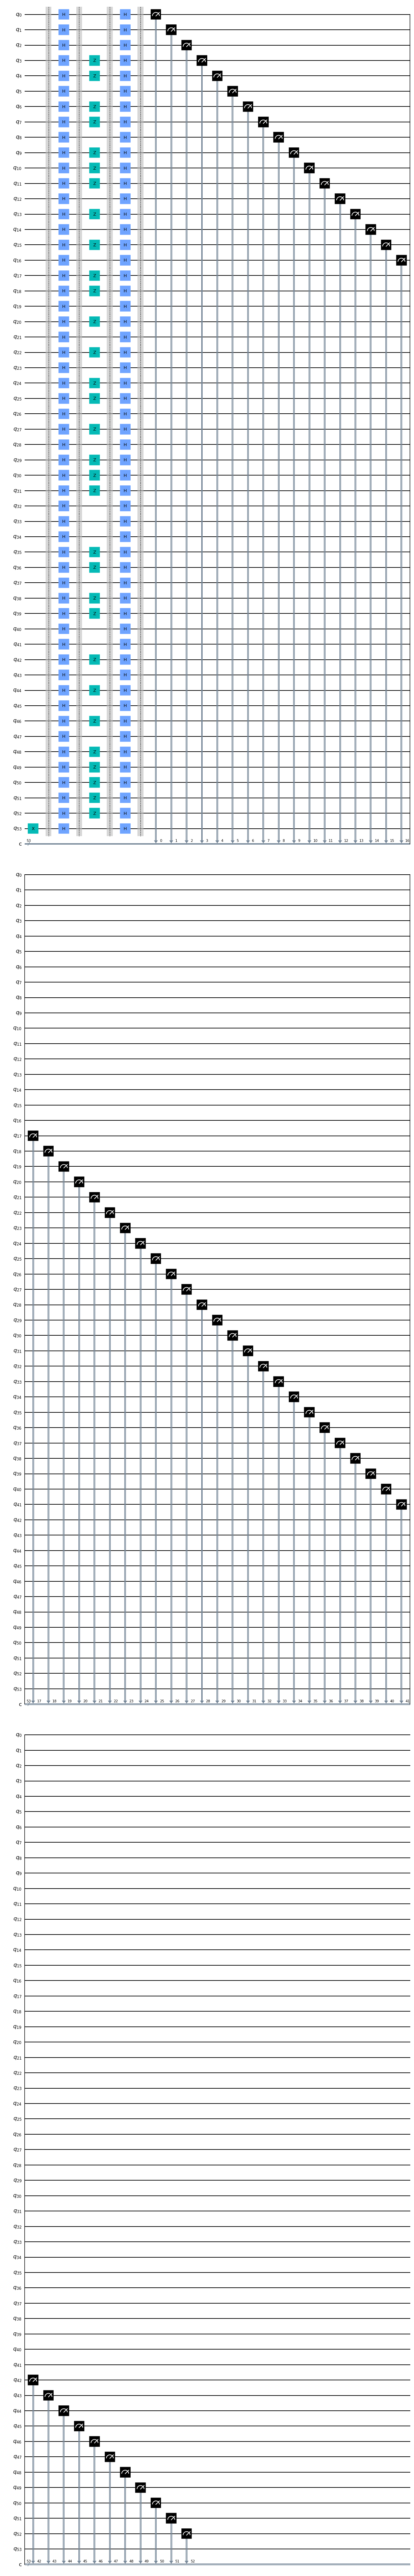

In [15]:
n = len(s)
# Step 1　Construct secret binary string

n = len(s)
qc = QuantumCircuit(n+1,n)

qc.x(n) #apply x gate
qc.barrier() #visual aid
qc.h(range(n+1)) #Apply hadamard gates to close circuit
qc.barrier() #visual aid
for ii, yesno in enumerate(reversed(s)):
    if yesno == '1': 
        qc.z(ii)

qc.barrier() # visual aid
qc.h(range(n+1)) #apply h gates

qc.barrier() #visual aid

qc.measure(range(n), range(n)) #Measure the input n qubits from 0 to n-1 and store the result in a classical register

qc.draw(output='mpl') #draw circuit

In [16]:
#Load IBM Q account and set provider
# IBMQ.load_account()
provider = IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q-utokyo')
#Find the least busy backend
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= (n+1) and
                                   not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)

ibmqfactory.load_account:WARNING:2021-05-28 16:46:12,515: Credentials are already in use. The existing account in the session will be replaced.


least busy backend:  ibmq_manhattan


In [19]:
from qiskit.compiler import transpile, assemble
mapped_circuit = transpile(qc, backend=backend)
qobj = assemble(mapped_circuit, backend=backend, shots=1024)

In [20]:
job = backend.run(qobj)

<ipython-input-20-f365777f8129>:1: DeprecationWarning: Passing a Qobj to Backend.run is deprecated and will be removed in a future release. Please pass in circuits or pulse schedules instead.
  job = backend.run(qobj)


In [25]:
job.status()

<JobStatus.QUEUED: 'job is queued'>

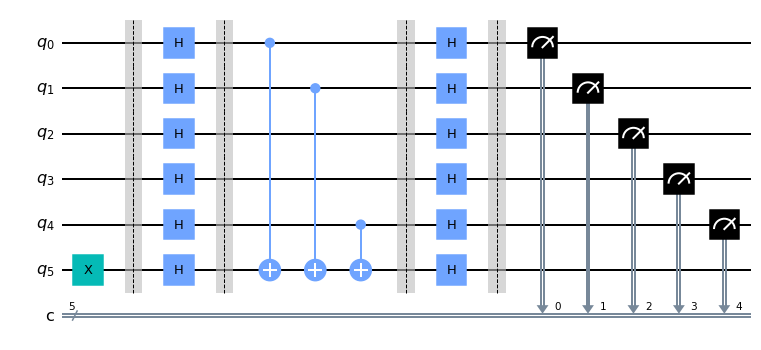

In [54]:
s = '10011'
n = len(s)
qc = QuantumCircuit(n+1,n)
qc.x(n) #apply x gate
qc.barrier() #visual aid
qc.h(range(n+1)) #Apply hadamard gates to close circuit

qc.barrier() #visual aid
for ii, yesno in enumerate(reversed(s)):
    if yesno == '1': 
        qc.cx(ii, n)

qc.barrier() # visual aid
qc.h(range(n+1)) #apply h gates
qc.barrier() #visual aid
qc.measure(range(n), range(n)) #Measure the input n qubits from 0 to n-1 and store the result in a classical register
qc.draw(output='mpl') #draw circuit

In [55]:
from qiskit.compiler import transpile, assemble
mapped_circuit = transpile(qc, backend=backend)
qobj = assemble(mapped_circuit, backend=backend, shots=1024)
job2 = backend.run(qobj)

In [56]:
job2.status()

<JobStatus.QUEUED: 'job is queued'>

In [50]:
result = job.result()
result2 = job2.result()

### proposed idea

In [44]:
max_count = 0
for ele in zip(result.get_counts().items()):
    if ele[0][1]>max_count:
        estimated_string = ele[0][0]
        max_count = ele[0][1]
    
print(estimated_string == s)
print(max_count)

### original idea

In [51]:
max_count = 0
for ele in zip(result2.get_counts().items()):
    if ele[0][1]>max_count:
        estimated_string = ele[0][0]
        max_count = ele[0][1]
    
print(estimated_string == s)
print(max_count)

False
1


In [52]:
result2.get_counts()

{'10000000000101000100011101100101110011100100111110110': 1,
 '10000000000101110101110001000111000111100110011100011': 1,
 '10000000011100101111111010000101100100100011000100011': 1,
 '10000000100101010110111010111111101101000000010100011': 1,
 '00001000000010011100111010110110101111110110001000100': 1,
 '10000001000001011110000010011111010111001010100000101': 1,
 '00001000000100001001001000010000010001011001001011001': 1,
 '10000001011011000010001001001100011010000000111100101': 1,
 '10000001100111001111001011111001100111110101010100011': 1,
 '10000001110111111101011100101110101111000101101110010': 1,
 '10000010000100010100010100010000011000101111010010000': 1,
 '10000010001010011111000000001001010100101001000011101': 1,
 '10000010001110001101010110010011110001110101000001001': 1,
 '10000010010001001010100011000000001001100100110011010': 1,
 '10000010010101001110100111110001000111001011100101000': 1,
 '10000010010111110010110000110000011011000101000010111': 1,
 '1000001010111111000101